In [65]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("silver_prices_10years.csv")

print(data.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [66]:
data['Lag1']  = data['Close'].shift(1)
data['Lag2']  = data['Close'].shift(2)
data['Lag3']  = data['Close'].shift(3)
data['Lag5']  = data['Close'].shift(5)
data['Lag10'] = data['Close'].shift(10)

data['MA7']  = data['Close'].rolling(7).mean()
data['MA30'] = data['Close'].rolling(30).mean()

data['Return']     = data['Close'].pct_change()
data['Volatility'] = data['Close'].rolling(7).std()

data['Target'] = data['Close'].shift(-1)
data = data.dropna()

features = ['Lag1', 'Lag2', 'Lag3', 'Lag5', 'Lag10', 'MA7', 'MA30', 'Return', 'Volatility']
X = data[features]
y = data['Target']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, shuffle=False)

In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2 Score: 0.9882647770808742
MAE: 0.7206210438922185
MSE: 1.585044700302905
RMSE: 1.2589855838344237


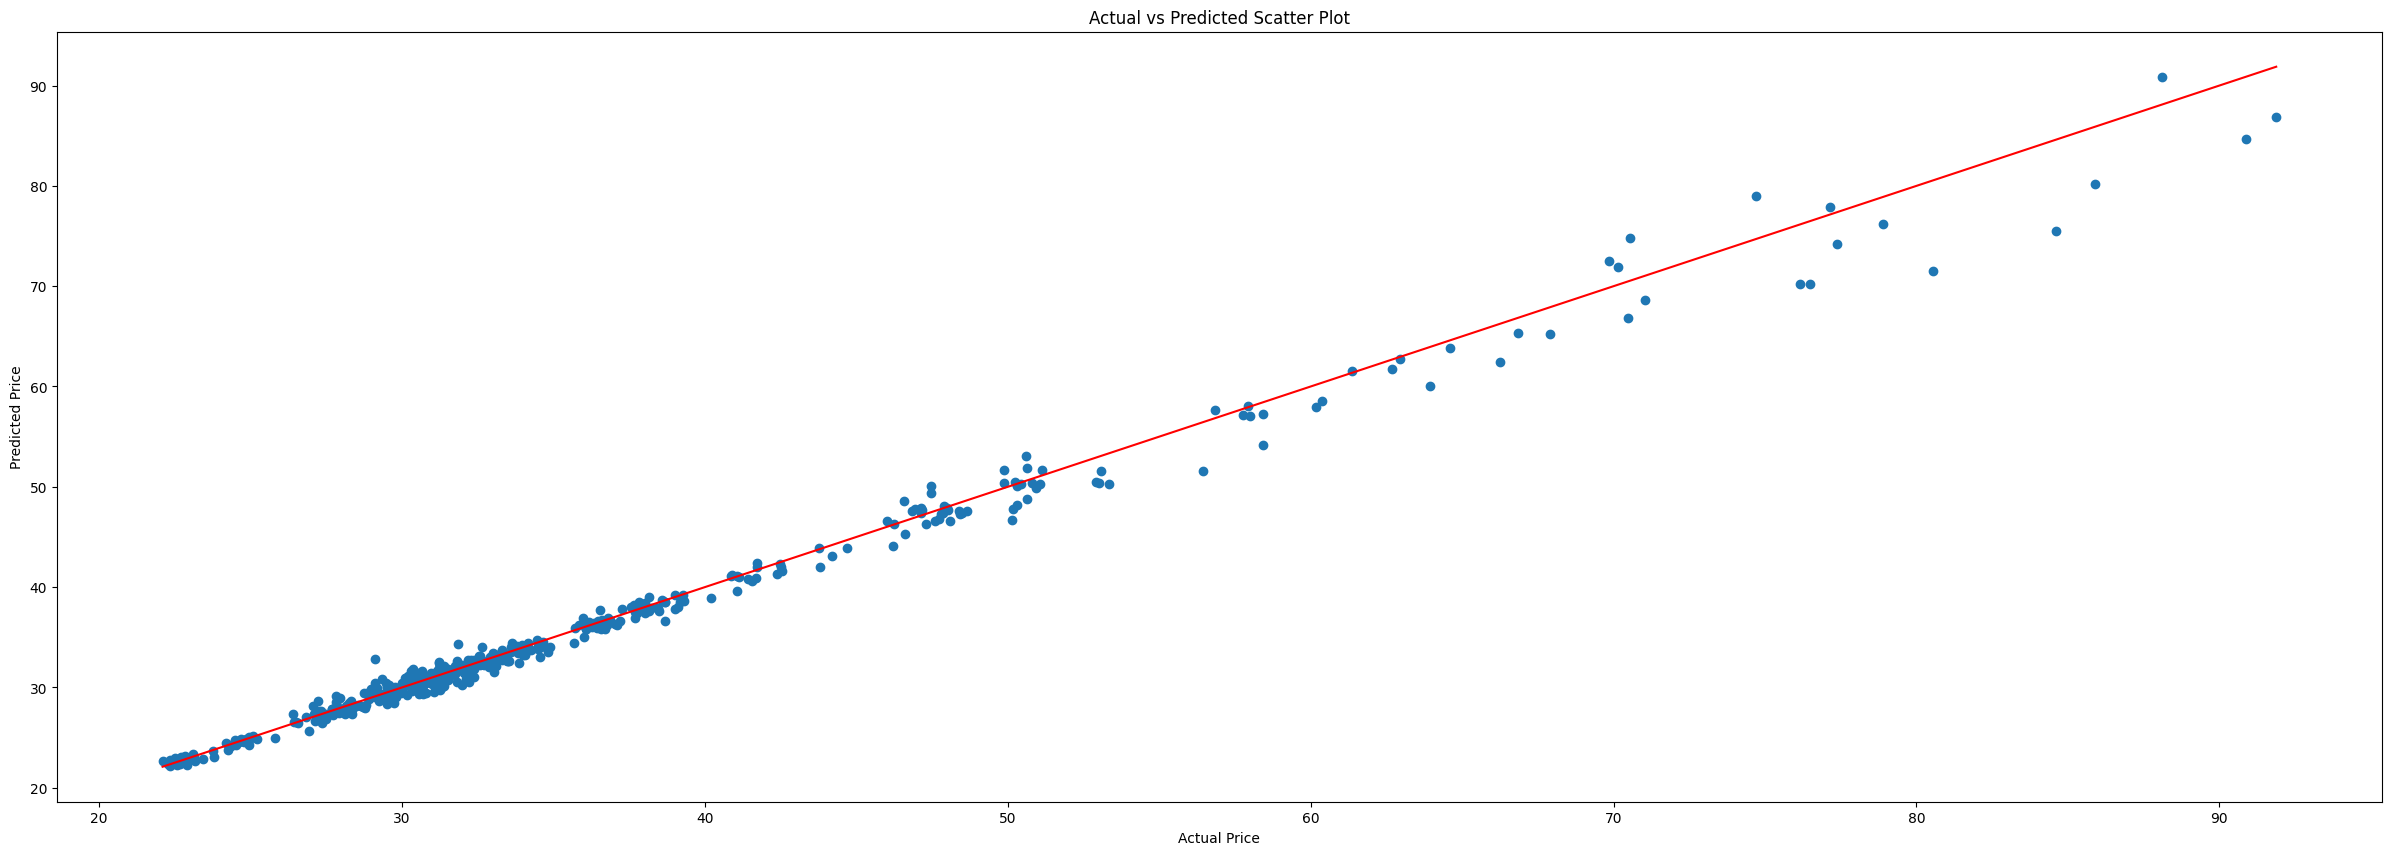

In [70]:
plt.figure(figsize=(30,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Scatter Plot")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.show()